# Cirq

### 3.1 Measurements After a Hadamard Transform on a Qubit Using Cirq

In [13]:
# Import the Package 
import cirq
# Define a Qubit  
qubit = cirq.GridQubit(0,0)
# Create a Cirquit in cirq 
circuit = cirq.Circuit([cirq.H(qubit),cirq.measure(qubit,key='m')])

print("Circuit Follows") 
print(circuit)



Circuit Follows
(0, 0): ───H───M('m')───


In [ ]:
# Simulate the Circuit

sim = cirq.Simulator() 
output = sim.run(circuit,repetitions=100) 
print("Measurement Output:")
print(output) 
print("Histogram stats follow") 
print(output.histogram(key='m'))

Measurement Output:
m=0010000111011101011010110001101000110101100101001000110011101010000010011011101101101001000010000111
Histogram stats follow
Counter({0: 53, 1: 47})


### 3.2 Measurement Convergence to Expected Probability of Outcomes

In [3]:
# Import the Package cirq 
import cirq
import matplotlib.pyplot as plt


In [ ]:
'''Define a function to create a Hadamard state measurement circuit
and simulate it for a given number of copies.'''

def hadamard_state_measurement(copies):
  # Define a Qubit
  qubit = cirq.GridQubit(0, 0) 
  # Create a Circuit in cirq
  circuit = cirq.Circuit([cirq.H(qubit),cirq.measure(qubit, key='m')])
  print("Circuit Follows") 
  print(circuit)
  # Simulate the Circuit
  sim = cirq.Simulator() 
  output = sim.run(circuit, repetitions=copies) 
  res = output.histogram(key='m')
  prob_0 = dict(res)[0] / copies 
  print(prob_0)
  return prob_0 

In [ ]:
'''
This function simulates the measurement of a qubit in the Hadamard state
multiple times and plots the convergence of the probability of measuring
the state |0>.
'''

def main(copies_low=10, copies_high=1000):
    probability_for_zero_state_trace = [] 
    copies_trace = []
    
    for n in range(copies_low, copies_high):
        copies_trace.append(n)
        prob_0 = hadamard_state_measurement(n) 
        probability_for_zero_state_trace.append(prob_0) 
    
    plt.plot(copies_trace, probability_for_zero_state_trace) 
    plt.xlabel('No of Measurements')
    plt.ylabel("Probability of the State 0") 
    plt.title("Convergence Sequence of Probability for State 0") 
    plt.show()


Circuit Follows
(0, 0): ───H───M('m')───
0.6
Circuit Follows
(0, 0): ───H───M('m')───
0.5454545454545454
Circuit Follows
(0, 0): ───H───M('m')───
0.5
Circuit Follows
(0, 0): ───H───M('m')───
0.6923076923076923
Circuit Follows
(0, 0): ───H───M('m')───
0.6428571428571429
Circuit Follows
(0, 0): ───H───M('m')───
0.6
Circuit Follows
(0, 0): ───H───M('m')───
0.5
Circuit Follows
(0, 0): ───H───M('m')───
0.47058823529411764
Circuit Follows
(0, 0): ───H───M('m')───
0.4444444444444444
Circuit Follows
(0, 0): ───H───M('m')───
0.5263157894736842
Circuit Follows
(0, 0): ───H───M('m')───
0.75
Circuit Follows
(0, 0): ───H───M('m')───
0.5238095238095238
Circuit Follows
(0, 0): ───H───M('m')───
0.4090909090909091
Circuit Follows
(0, 0): ───H───M('m')───
0.5652173913043478
Circuit Follows
(0, 0): ───H───M('m')───
0.4166666666666667
Circuit Follows
(0, 0): ───H───M('m')───
0.44
Circuit Follows
(0, 0): ───H───M('m')───
0.38461538461538464
Circuit Follows
(0, 0): ───H───M('m')───
0.5925925925925926
Circui

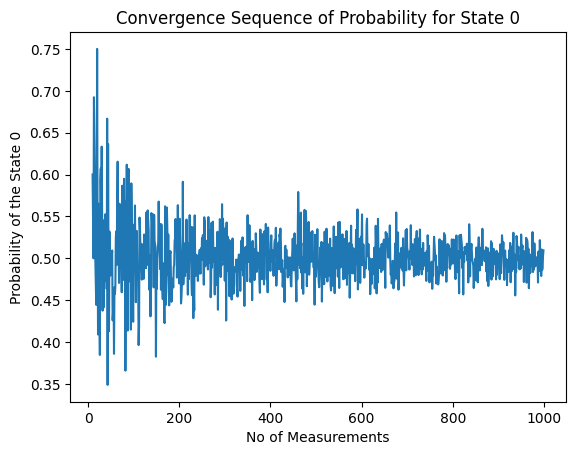

In [11]:
if __name__ == '__main__':
    main()  

# Qiskit

### 3.3 Measurements After a Hadamard Transform on a Qubit Using Qiskit

In [2]:
# Import Qiskit
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

Measurement counts: {'1': 509, '0': 491}
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


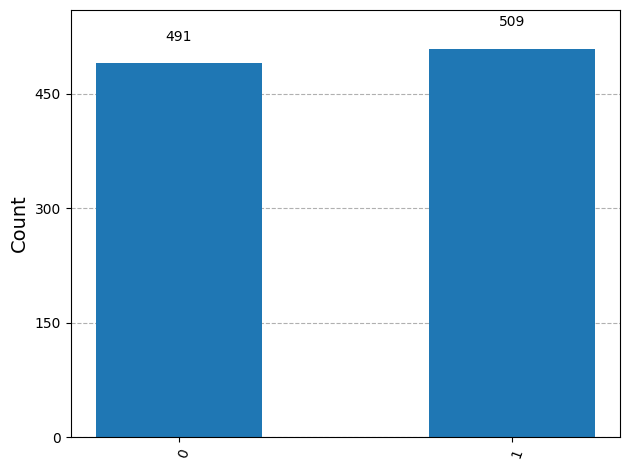

In [5]:
# Create a quantum circuit with 1 qubit and 1 classical bit
qc = QuantumCircuit(1, 1)

# Apply Hadamard gate to put qubit in superposition
qc.h(0)

# Measure the qubit
qc.measure(0, 0)

# Use AerSimulator as backend
backend = AerSimulator()

# Run the circuit with 1000 shots
result = backend.run(qc, shots=1000).result()

# Get measurement counts
counts = result.get_counts()
print("Measurement counts:", counts)

# Draw the circuit
print(qc.draw(output='text'))

# Plot histogram
plot_histogram(counts)